### import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### read the csv file where df is my main data set

In [2]:
df = pd.read_csv('C:\\Users\\shad1\\Documents\\Anaconda\\1 Netflix or Movie Dataset Analysis\\data\\netflix_titles.csv')

### shows the first 5 rows to understand the structure

In [3]:
df.head

<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabal

### shows column names, data types, and how many missing values exist

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### gives summary statistics (mean, min, max) for numeric columns

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### shows number of rows and columns

In [6]:
df.shape

(8807, 12)

### Counts how many NaN (missing) values per column

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### if a movie has no country listed, replace with 'Unknown' only on country col

In [8]:
df['country'] = df['country'].fillna('Unknown')

### remove rows where rating is missing (because it’s important for analysis) and save the new dataset in to the df

In [9]:
df = df.dropna(subset=['rating'])

### make a copy after filter

In [10]:
df = df.copy()

### Remove leading/trailing spaces before converting

In [11]:
df['date_added'] = df['date_added'].str.strip()

### Convert to datetime safely, allowing errors to be handled

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') 

### adds a new column year_added that stores only the year

In [13]:
df['year_added'] = df['date_added'].dt.year

### extract the numeric part only and added new collum as duration_int

In [14]:
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)

# Exploratory Data Analysis

### using graph of Movies vs TV Shows

- sns.countplot() → counts how many Movies vs TV Shows.

- x='type' → category column (Movie or TV Show).

- palette='Set2' → nice color set.

C:\Users\shad1\AppData\Local\Temp\ipykernel_22192\1456381281.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


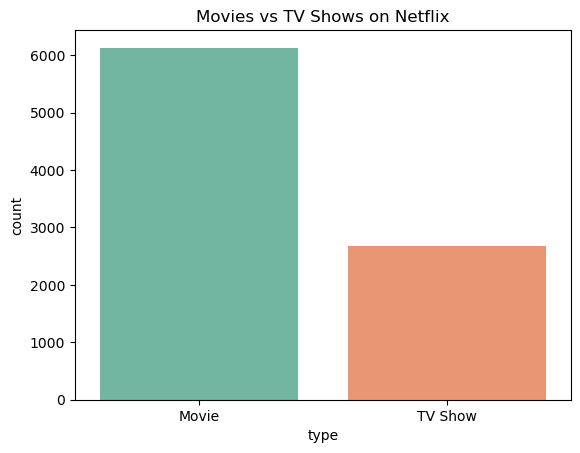

In [15]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.show()

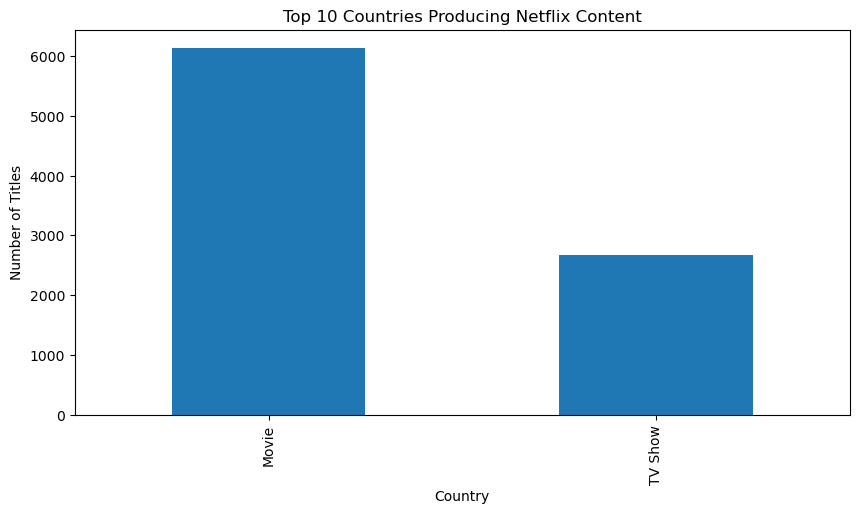

In [16]:
df['type'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

### using bar of Top 10 Countries

- value_counts() → counts each country.

- head(10) → top 10 only.

- plot(kind='bar') → bar chart.

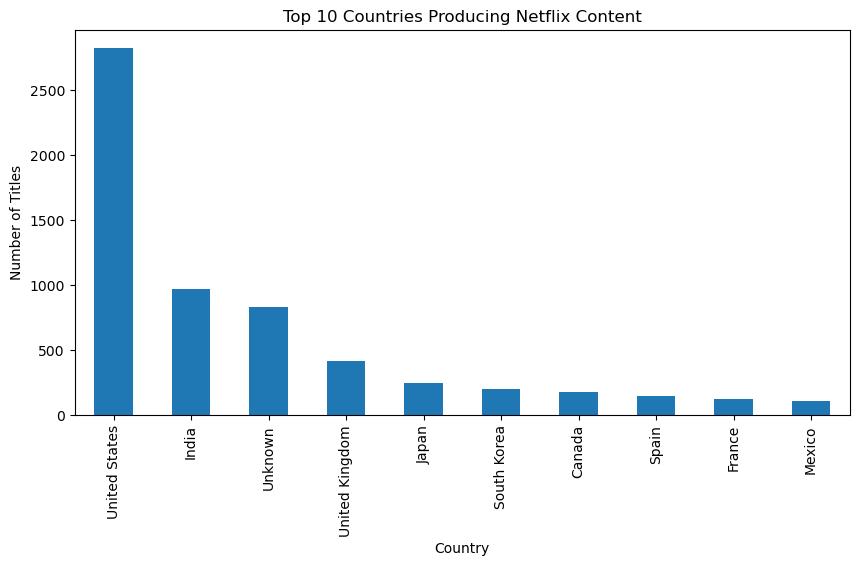

In [17]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

### using bar of Content Added Over Time

- value_counts() → counts each year.

- sort_index() → sorts by year.

- plot(kind='line') → line chart.

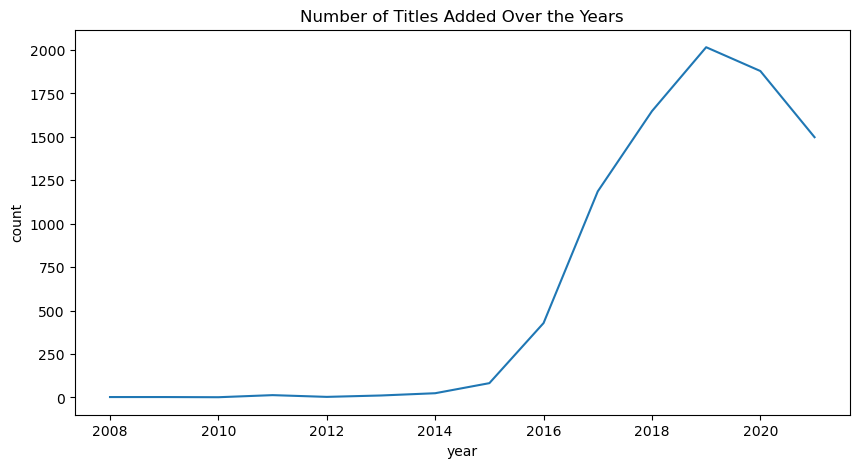

In [18]:
df['year_added'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title('Number of Titles Added Over the Years')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

### using bar of Content Added Over Time

- value_counts() → counts each year.

- sort_index() → sorts by year.

- plot(kind='line') → line chart.

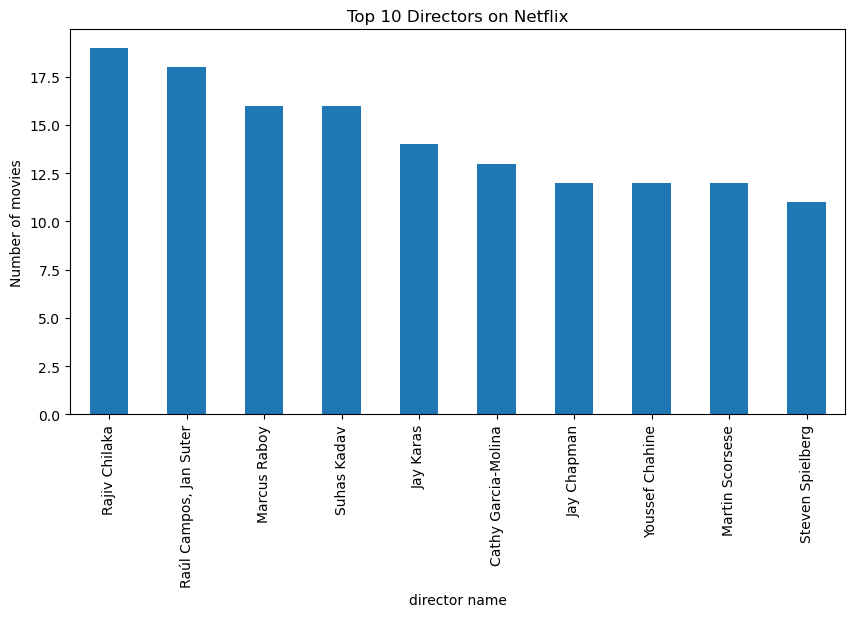

In [19]:
df['director'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Directors on Netflix')
plt.xlabel('director name')
plt.ylabel('Number of movies')
plt.show()

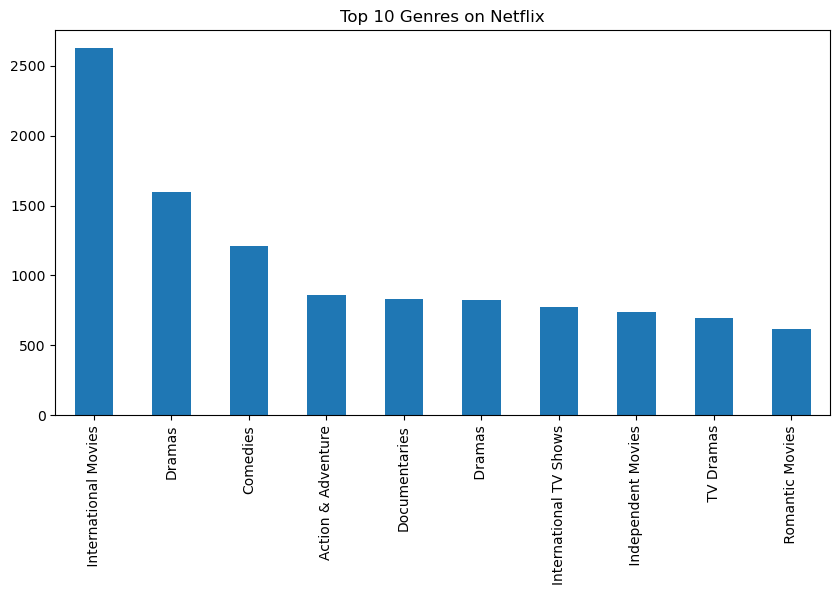

In [20]:
genres = ','.join(df['listed_in']).split(',')
genre_count = pd.Series(Counter(genres))
genre_count.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Genres on Netflix')
plt.show()